# Partial Dependance Plot

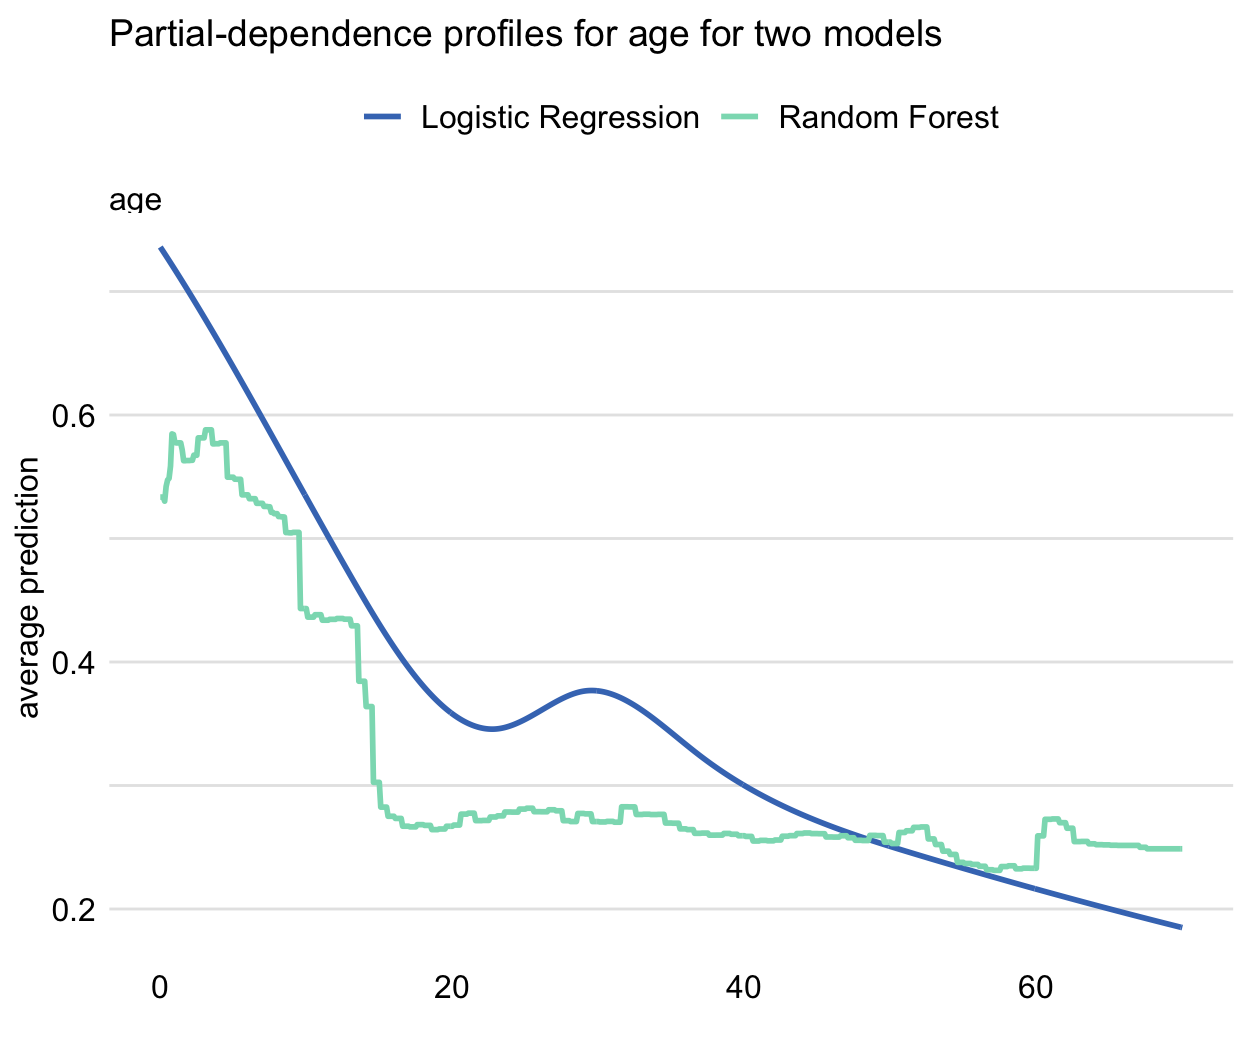

## Pros
 * easy to understand
 * intuitive
 * can handle interaction in multidimensional case

## Cons
 * struggle with correlated features
 

## Examples

In [59]:
data(titanic_imputed, package = "DALEX")

model <- ranger::ranger(survived~., data = titanic_imputed, classification = TRUE, probability = TRUE)

In [60]:
library(mlr)
titanic_imputed_fct <- titanic_imputed
titanic_imputed_fct$survived <- as.factor(titanic_imputed_fct$survived)

classif_task <- makeClassifTask(data = titanic_imputed_fct, target = "survived")
classif_lrn <- makeLearner("classif.svm", predict.type = "prob")
model_mlr <- train(classif_lrn, classif_task)

In [61]:
library(DALEX)
library(DALEXtra)
explainer <- DALEX::explain(model = model,
                     data = titanic_imputed[,-8],
                     y = titanic_imputed$survived)

Preparation of a new explainer is initiated
  -> model label       :  ranger  (  default  )
  -> data              :  2207  rows  7  cols 
  -> target variable   :  2207  values 
  -> predict function  :  yhat.ranger  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package ranger , ver. 0.12.1 , task classification (  default  ) 
  -> predicted values  :  numerical, min =  0.01617169 , mean =  0.3220857 , max =  0.9893769  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.7831964 , mean =  7.110348e-05 , max =  0.8825705  
  A new explainer has been created!  


In [62]:
explainer_mlr <- explain_mlr(model = model_mlr,
                         data = titanic_imputed_fct[,-8],
                         y = as.numeric(as.character(titanic_imputed_fct$survived)))

Preparation of a new explainer is initiated
  -> model label       :  WrappedModel  (  default  )
  -> data              :  2207  rows  7  cols 
  -> target variable   :  2207  values 
  -> predict function  :  yhat.WrappedModel  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package mlr , ver. 2.19.0 , task classification (  default  ) 
  -> predicted values  :  numerical, min =  0.08670647 , mean =  0.3237829 , max =  0.9591736  
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.8626463 , mean =  -0.001626122 , max =  0.9064164  
  A new explainer has been created!  


In [63]:
pdp_1 <- model_profile(explainer, variables = "fare")

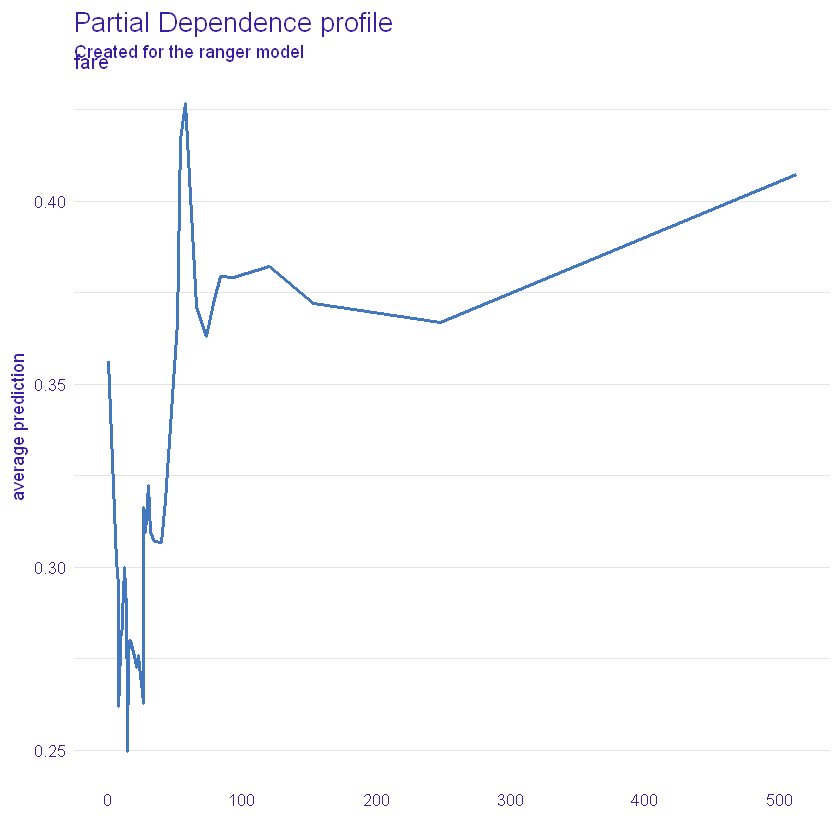

In [64]:
plot(pdp_1)

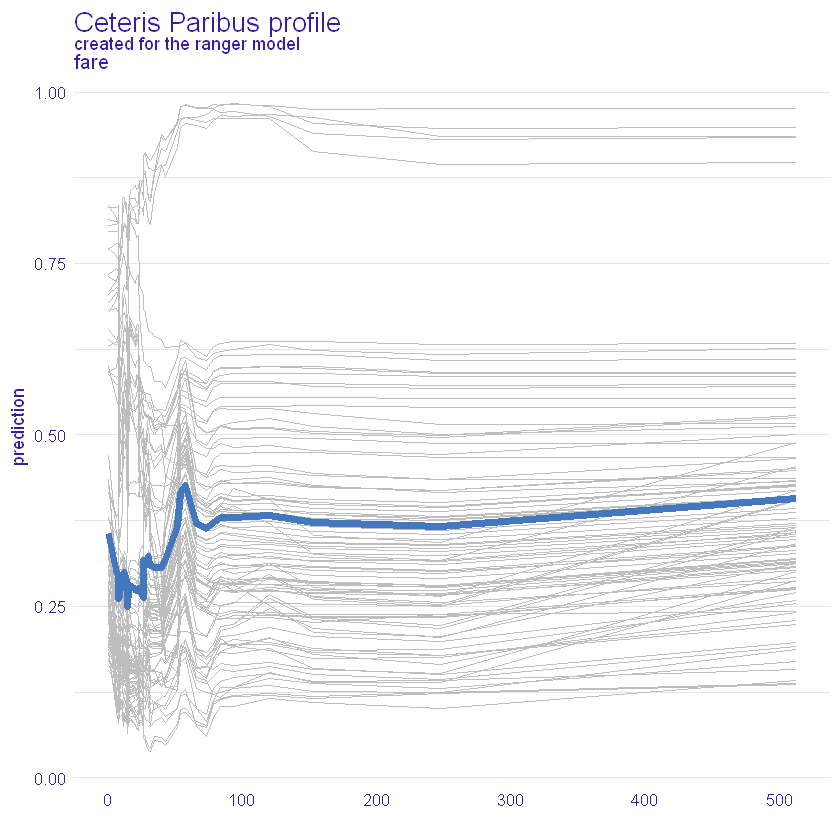

In [65]:
plot(pdp_1, geom = "profiles")

In [66]:
?model_profile

In [67]:
pdp_2 <- model_profile(explainer, variables = "fare", N = 1000, grid_points = 100)

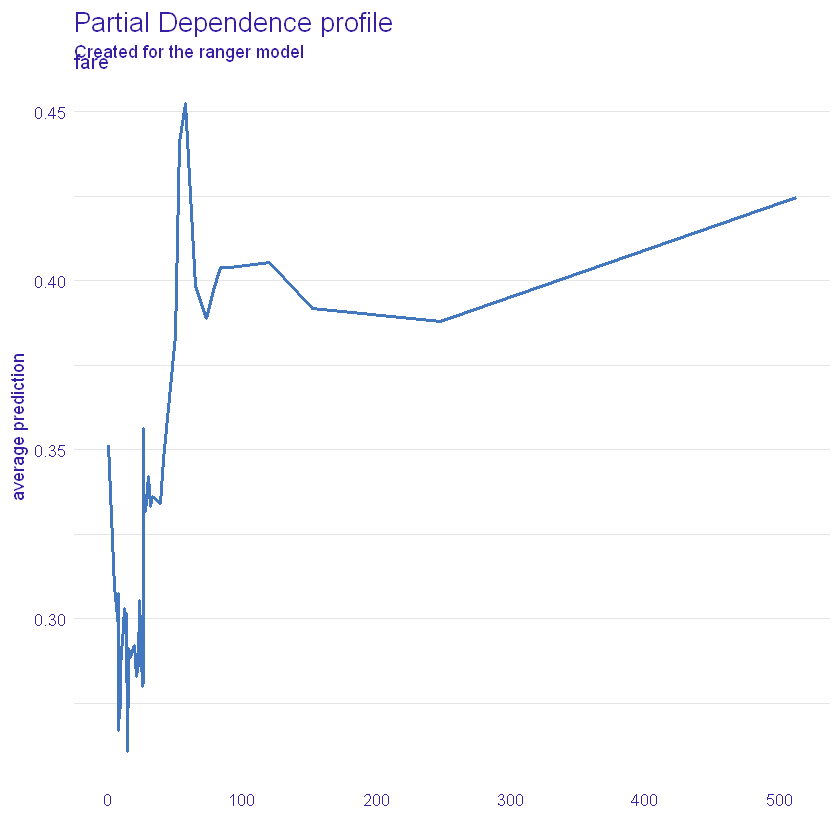

In [68]:
plot(pdp_2)

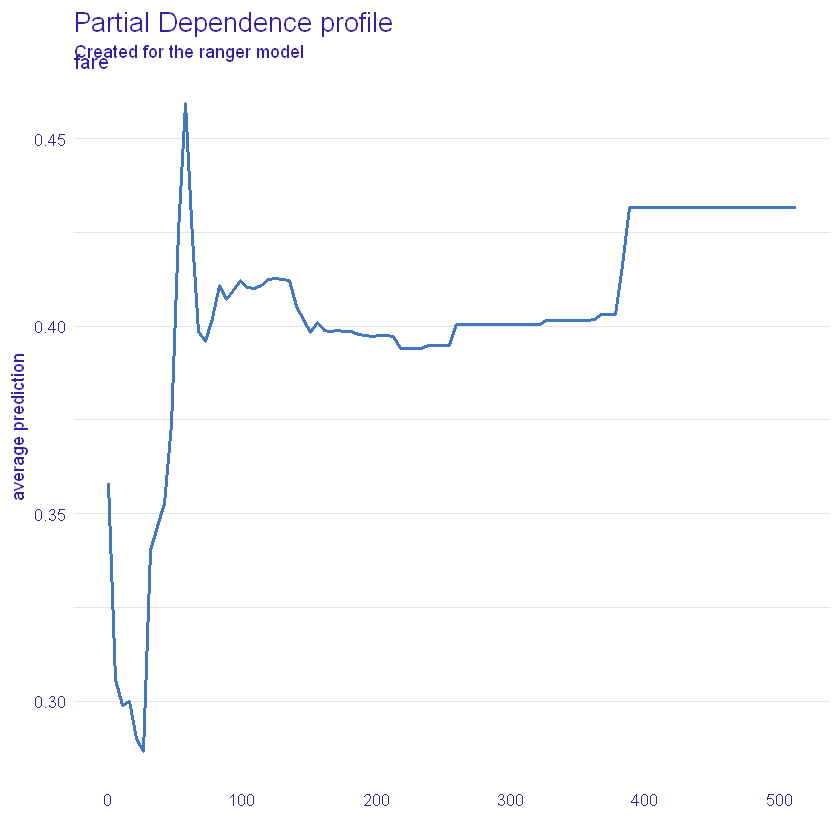

In [69]:
pdp_3 <- model_profile(explainer, variables = "fare", N = 1000, grid_points = 100, variable_splits_type = "uniform")
plot(pdp_3)

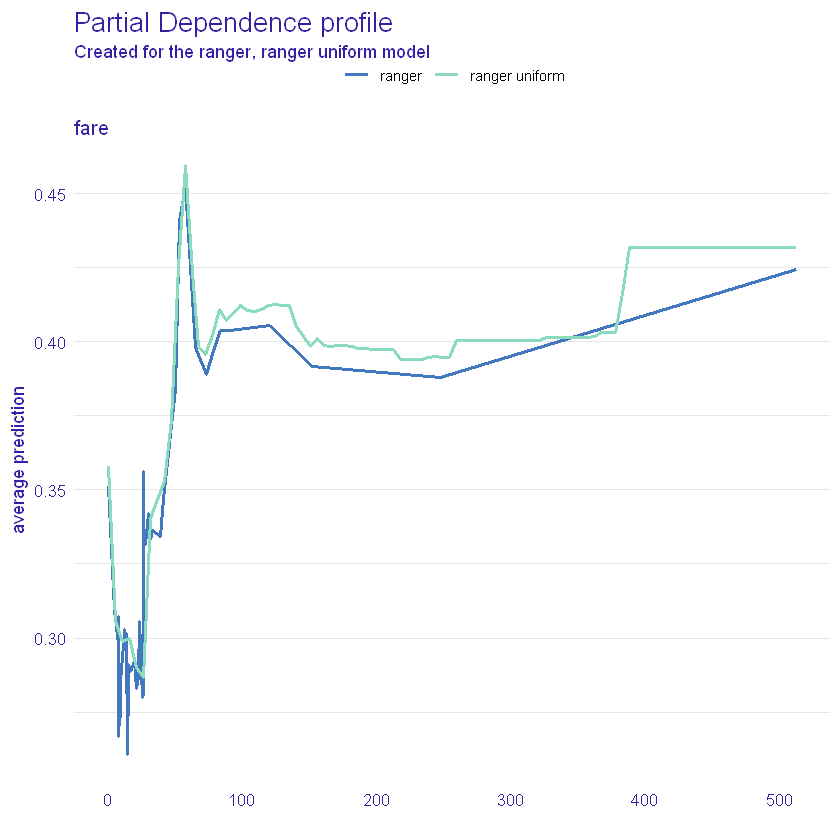

In [72]:
pdp_3$agr_profiles$`_label_` <- "ranger uniform"
plot(pdp_2, pdp_3)

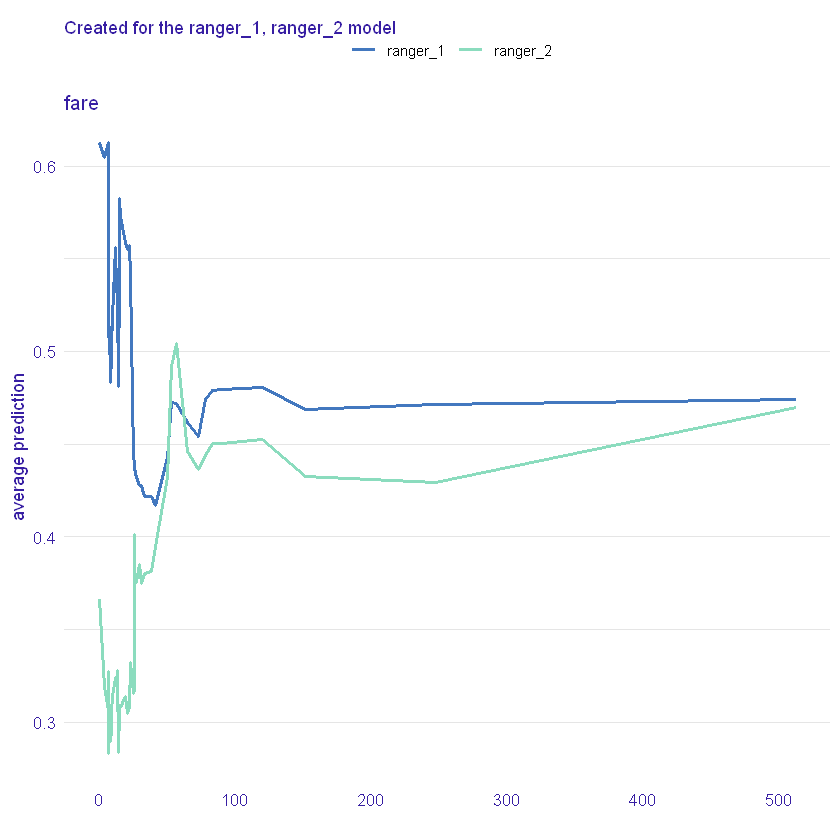

In [73]:
pdp_4 <- model_profile(explainer, variables = "fare", N = 100, grid_points = 100,
                      k = 2)
plot(pdp_4)

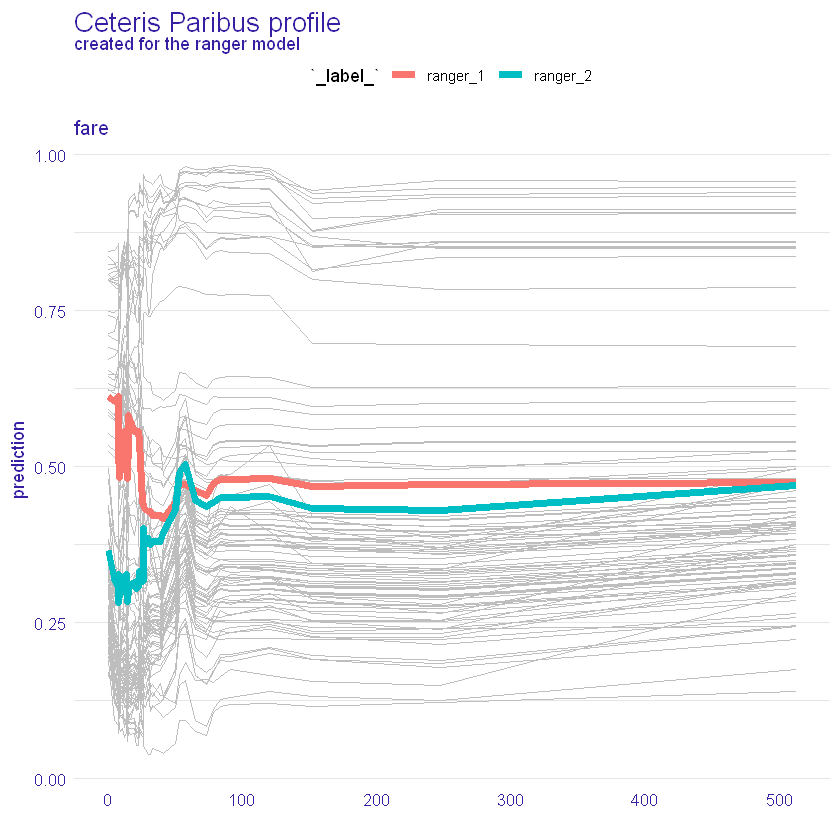

In [74]:
plot(pdp_4, geom = "profiles")

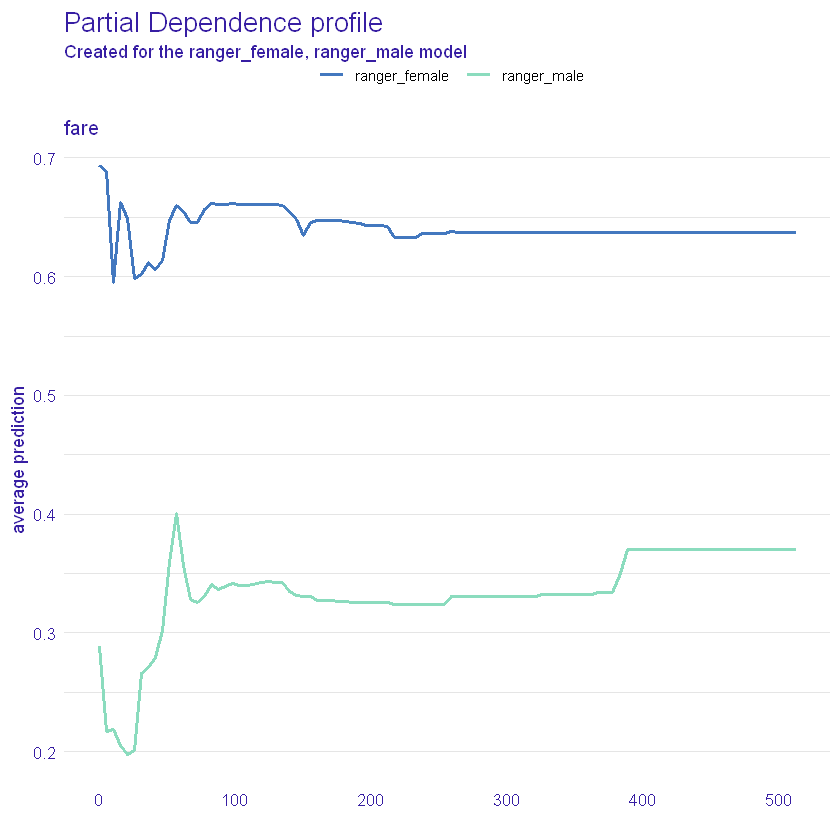

In [75]:
pdp_5 <- model_profile(explainer, variables = "fare", N = 100, grid_points = 100, variable_splits_type = "uniform", groups = "gender")
plot(pdp_5)

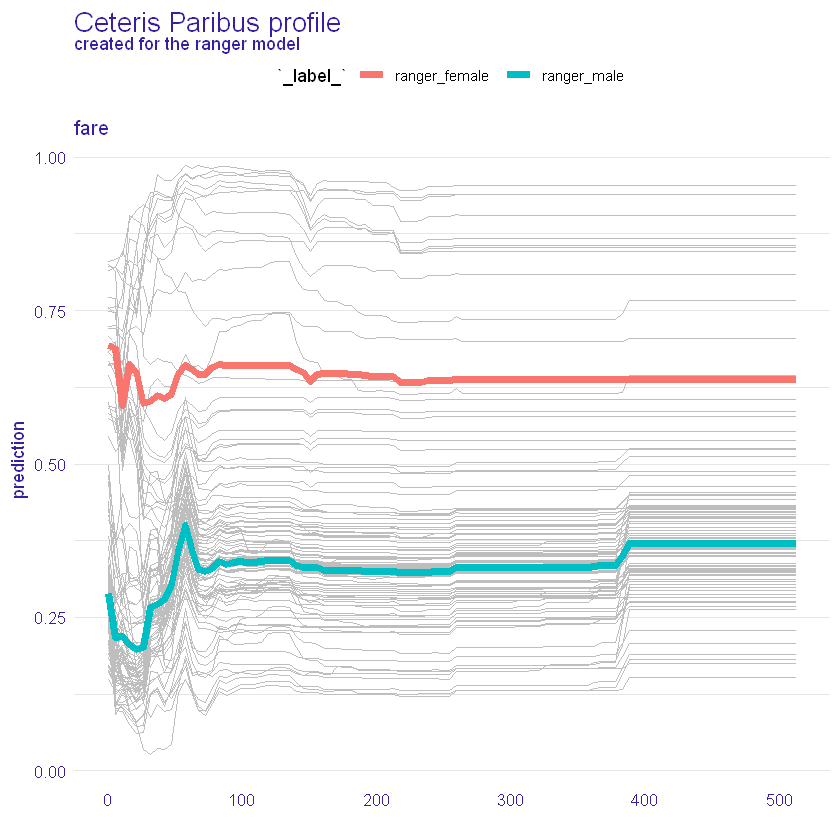

In [76]:
plot(pdp_5, geom = "profiles")

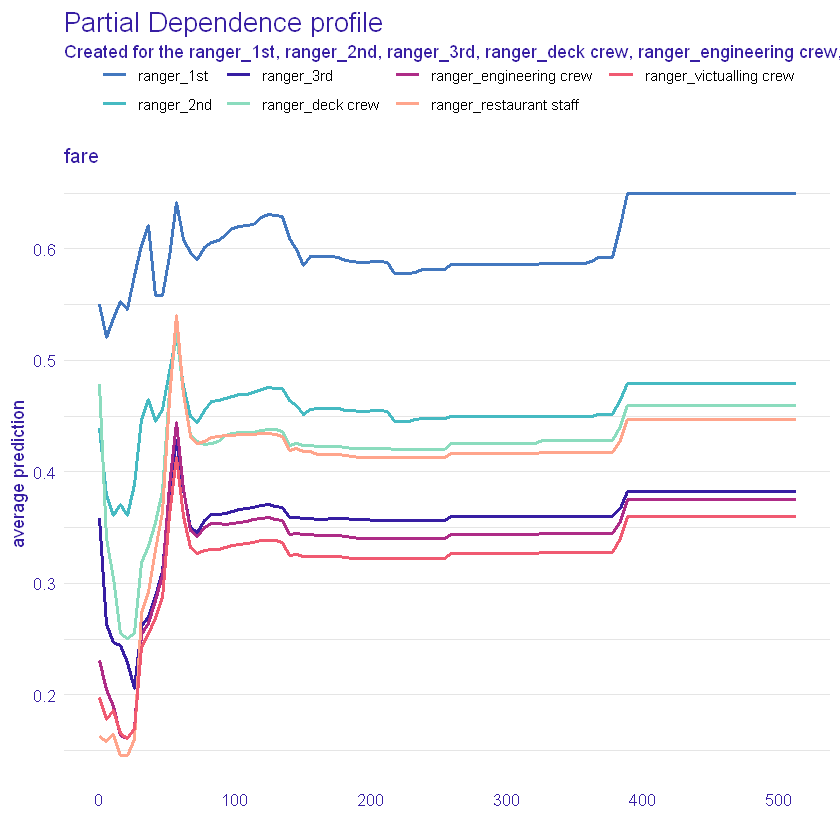

In [23]:
pdp_6 <- model_profile(explainer, variables = "fare", N = 100, grid_points = 100, variable_splits_type = "uniform", groups = "class")
plot(pdp_6)

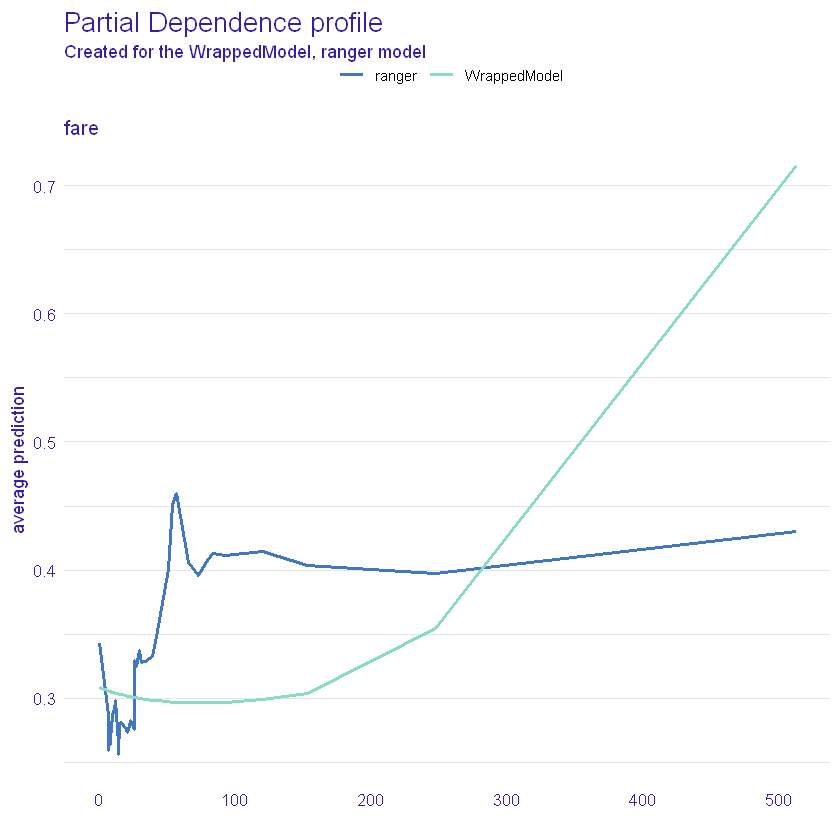

In [77]:
pdp_7 <- model_profile(explainer, variables = "fare")
pdp_8 <- model_profile(explainer_mlr, variables = "fare")
plot(pdp_8, pdp_7)

# Accumulated Local Effect

## Pros
 * Can handle correlated features

## Cons
 * Hard to understand, easy to intepretate
 

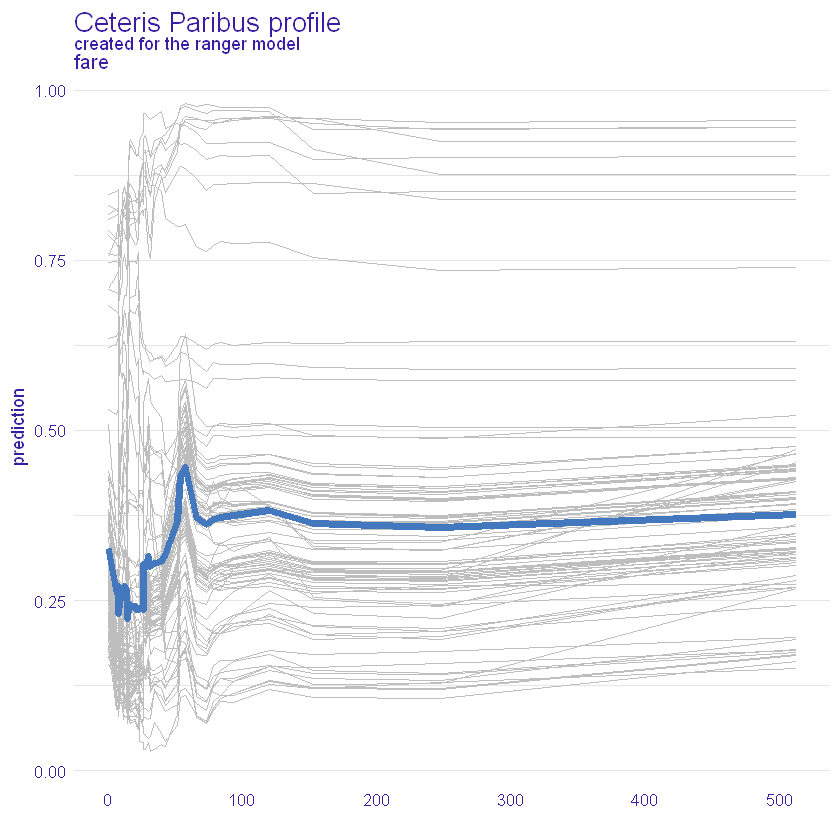

In [55]:
ale_1 <- model_profile(explainer, variables = "fare", type = "accumulated", )
plot(ale_1, geom = "profiles")

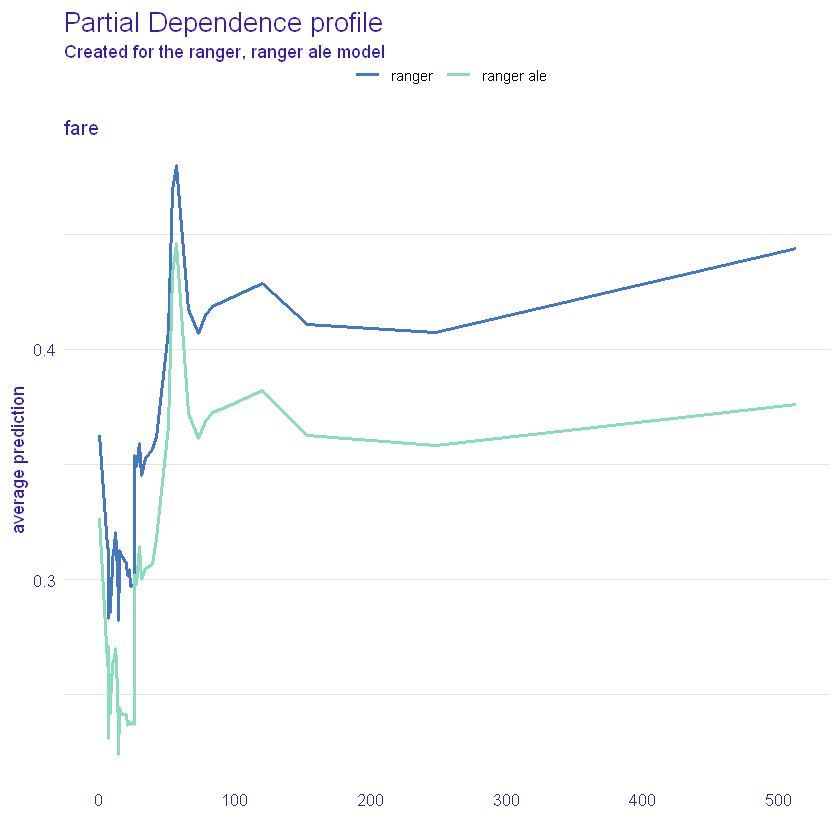

In [56]:
ale_1$agr_profiles$`_label_` <- "ranger ale"
plot(pdp_1, ale_1)

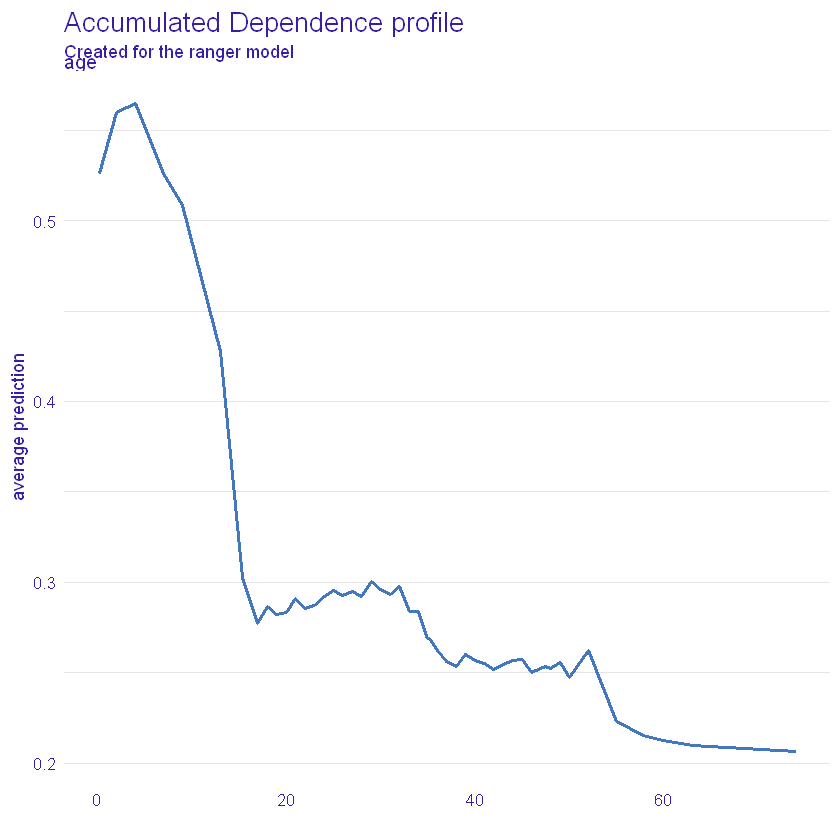

In [57]:
ale_2 <- model_profile(explainer, variables = "age", type = "accumulated")
plot(ale_2)

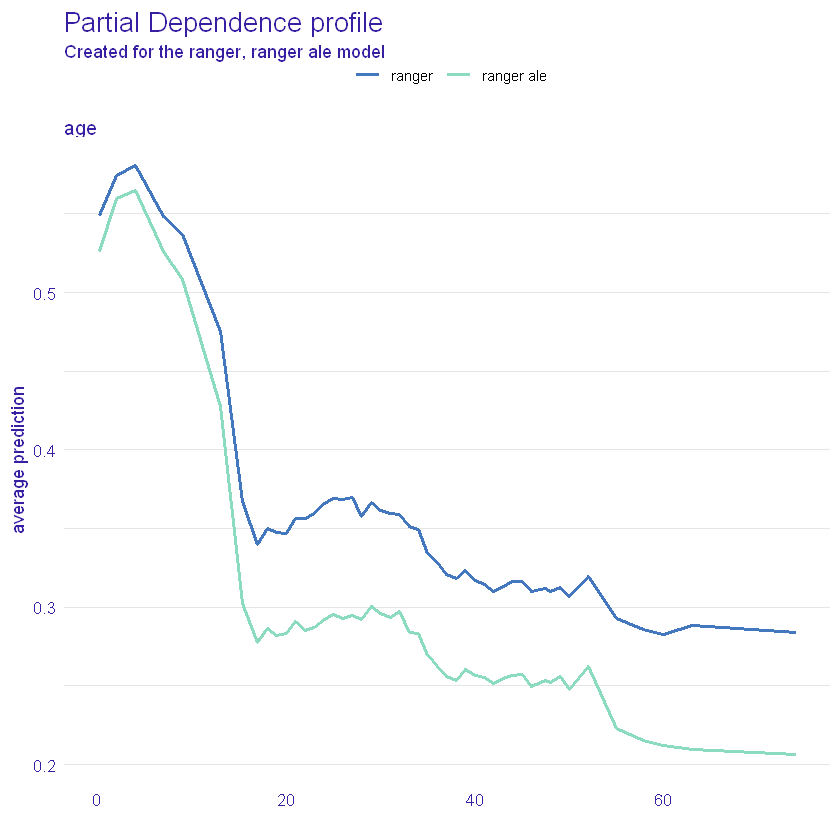

In [58]:
pdp_22 <- model_profile(explainer, variables = "age", type = "partial")
ale_2$agr_profiles$`_label_` <- "ranger ale"
plot(pdp_22, ale_2)

In [54]:
?model_profile